In [30]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\statsfaction'

In [31]:
from prediction_prime_overall.src.predict import predict_and_explain_players, analyze_individual_ID
from prediction_prime_overall.src.eval import create_polar_plot
import prediction_prime_overall.config as CONFIG

# Import your group to analyze

In [32]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE  FIFA = 2024 and Age < 23 and potential > 65 and overall <90
GROUP BY ID
order by potential DESC;
"""


import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(CONFIG.DATABASE)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

# Seiten wurden umgestellt und Feld hat jetzt neuen Inhalt
# df_prospect['Position'] = [value.strip() for item in df_prospect["Position"] for value in item.split(',')]
# df_prospect['Position'] = [i.replace(' ',',') for i in df_prospect['Position']]

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Att. Position,Composure,Defensive awareness
0,22.0,238794,Vini Jr.,22.0,https://cdn.sofifa.net/players/238/794/24_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,89.0,94.0,Real Madrid,...,18.0,5.0,7.0,7.0,7.0,10.0,2024,None,79.0,32.0
1,20.0,256790,J. Musiala,20.0,https://cdn.sofifa.net/players/256/790/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,93.0,FC Bayern München,...,68.0,6.0,9.0,8.0,8.0,11.0,2024,None,84.0,64.0
2,20.0,251854,Pedri,20.0,https://cdn.sofifa.net/players/251/854/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,86.0,92.0,FC Barcelona,...,65.0,12.0,7.0,11.0,8.0,8.0,2024,None,87.0,68.0
3,22.0,247635,K. Kvaratskhelia,22.0,https://cdn.sofifa.net/players/247/635/24_60.png,Georgia,https://cdn.sofifa.net/flags/ge.png,86.0,92.0,Napoli,...,34.0,9.0,15.0,8.0,14.0,8.0,2024,None,82.0,38.0
4,20.0,256630,F. Wirtz,20.0,https://cdn.sofifa.net/players/256/630/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,91.0,Bayer 04 Leverkusen,...,44.0,14.0,14.0,13.0,6.0,10.0,2024,None,83.0,59.0


In [33]:
sum(df_prospect.ID == 259399)

1

In [34]:
df_prospect.Positioning

0       87.0
1       81.0
2       79.0
3       84.0
4       80.0
        ... 
5427     4.0
5428    48.0
5429    59.0
5430    49.0
5431    57.0
Name: Positioning, Length: 5432, dtype: float64

## Choose a from a Set of trained models

In [35]:
import pickle

with open(f"{CONFIG.MODELS}/offense_potential_forward_general.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Huber Regression']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       374
        True       0.00      0.00      0.00         6

    accuracy                           0.98       380
   macro avg       0.49      0.50      0.50       380
weighted avg       0.97      0.98      0.98       380



# Analyze individual Players

pred [77.19269581]
[(268421, 'M. Tel', 2024)]


100%|██████████| 1/1 [00:05<00:00,  5.33s/it]


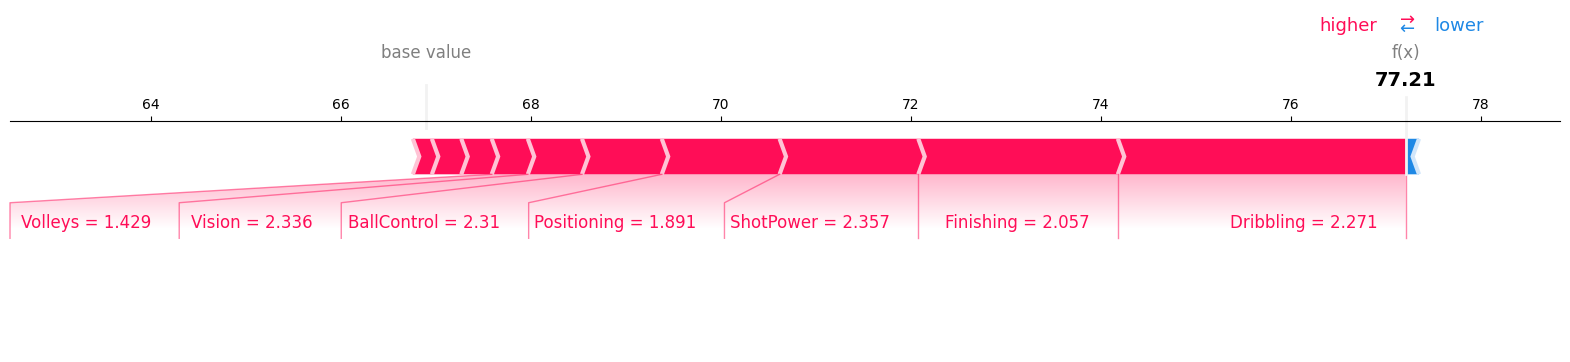

                (268421, M. Tel, 2024)  shap
Finishing                         74.0  2.10
Volleys                           63.0  0.38
Dribbling                         77.0  3.03
BallControl                       76.0  0.84
SprintSpeed                       74.0  0.20
Agility                           76.0  0.31
ShotPower                         79.0  1.46
Strength                          67.0  0.32
Positioning                       72.0  1.24
Vision                            67.0  0.57
HeadingAccuracy                   55.0 -0.14


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


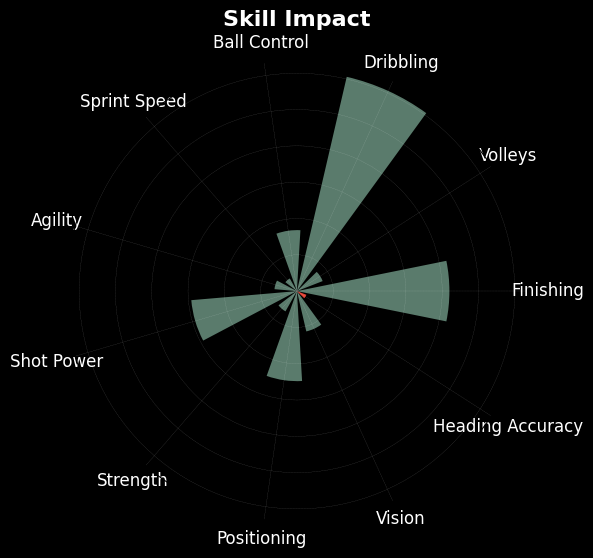

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [79.67984933]
[(259399, 'R. Højlund', 2024)]


100%|██████████| 1/1 [00:05<00:00,  5.37s/it]


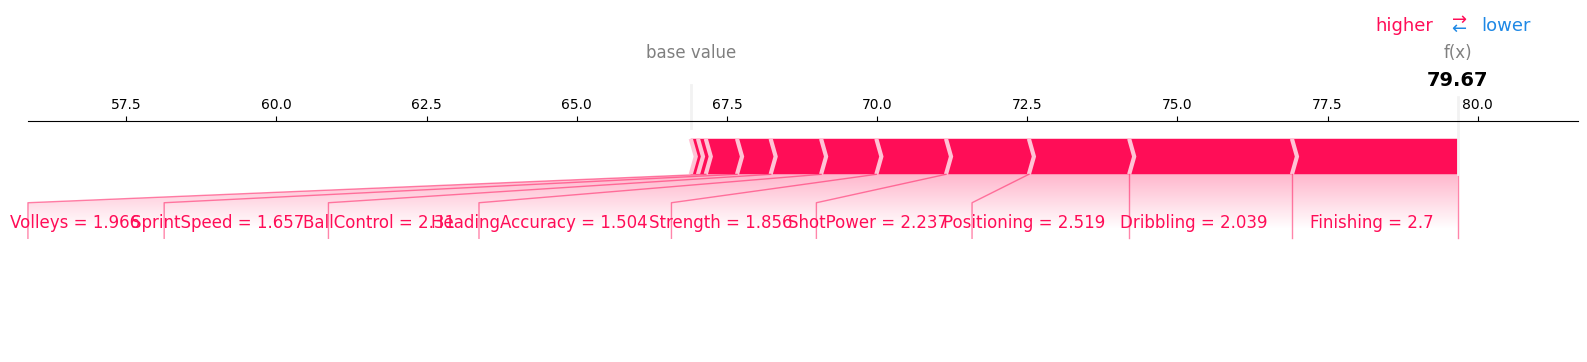

                (259399, R. Højlund, 2024)  shap
Finishing                             78.0  2.76
Volleys                               68.0  0.52
Dribbling                             75.0  2.71
BallControl                           76.0  0.84
SprintSpeed                           85.0  0.56
Agility                               69.0  0.13
ShotPower                             78.0  1.38
Strength                              84.0  1.16
Positioning                           77.0  1.67
Vision                                54.0  0.12
HeadingAccuracy                       70.0  0.92


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


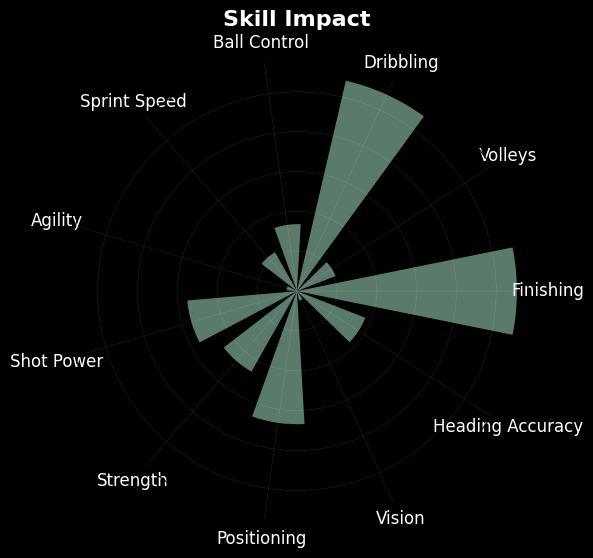

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [80.58296047]
[(240833, 'Y. Moukoko', 2024)]


100%|██████████| 1/1 [00:04<00:00,  4.41s/it]


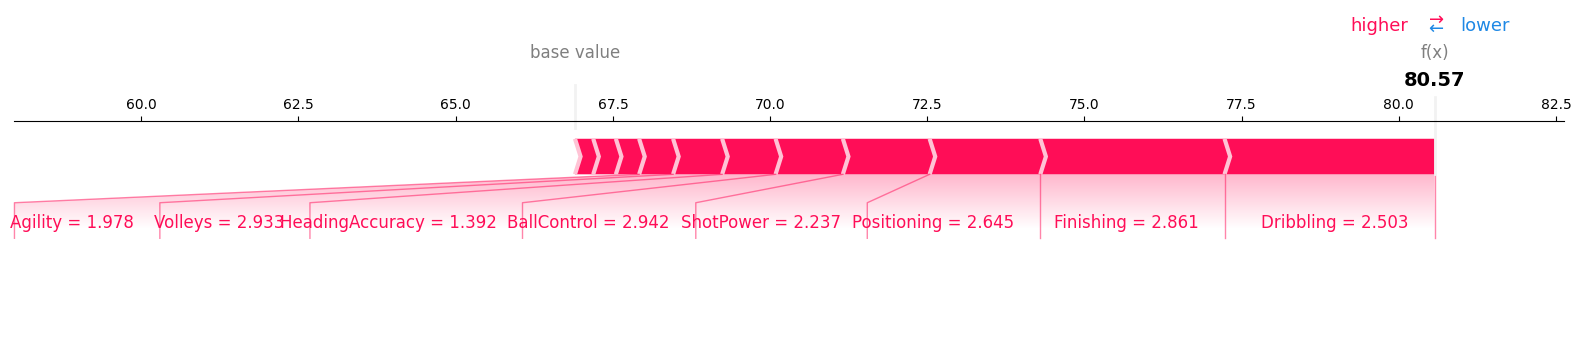

                (240833, Y. Moukoko, 2024)  shap
Finishing                             79.0  2.93
Volleys                               77.0  0.78
Dribbling                             79.0  3.34
BallControl                           81.0  1.07
SprintSpeed                           79.0  0.36
Agility                               85.0  0.54
ShotPower                             78.0  1.38
Strength                              68.0  0.37
Positioning                           78.0  1.76
Vision                                59.0  0.29
HeadingAccuracy                       69.0  0.85


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


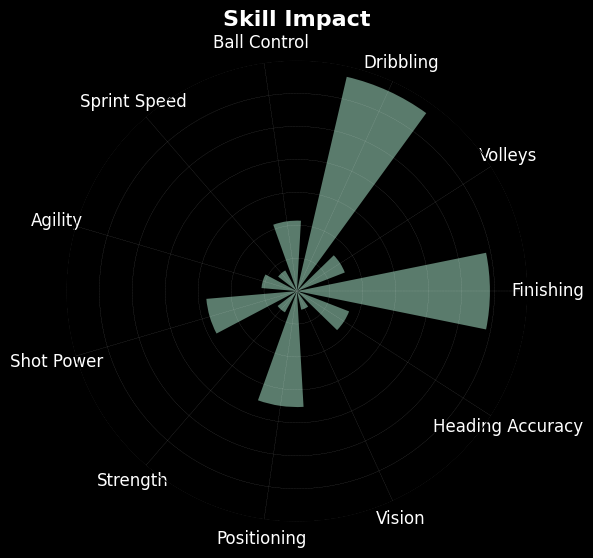

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [81.78418371]
[(251852, 'K. Adeyemi', 2024)]


100%|██████████| 1/1 [00:03<00:00,  3.92s/it]


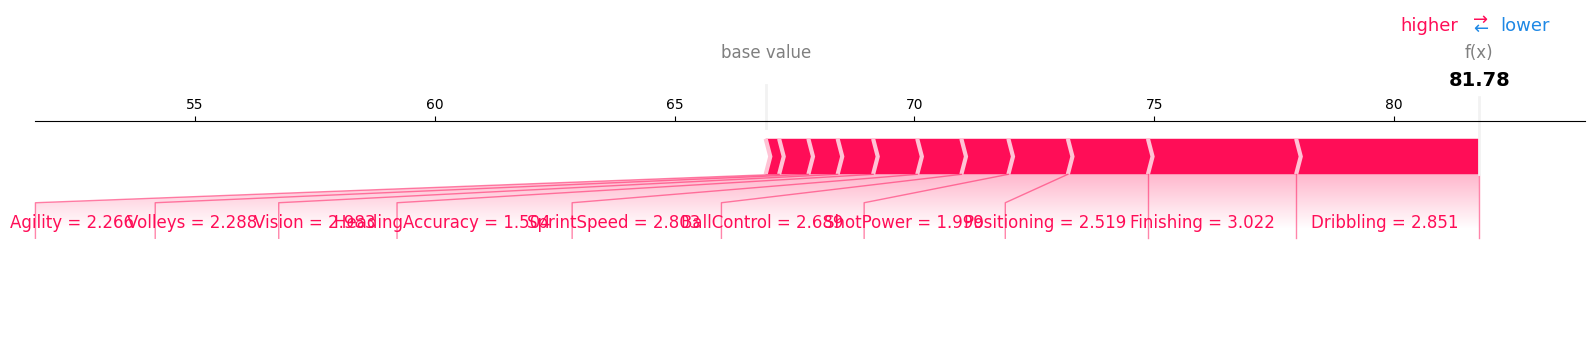

                (251852, K. Adeyemi, 2024)  shap
Finishing                             80.0  3.09
Volleys                               71.0  0.61
Dribbling                             82.0  3.82
BallControl                           79.0  0.98
SprintSpeed                           96.0  0.92
Agility                               88.0  0.61
ShotPower                             76.0  1.24
Strength                              66.0  0.28
Positioning                           77.0  1.67
Vision                                72.0  0.74
HeadingAccuracy                       70.0  0.92


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


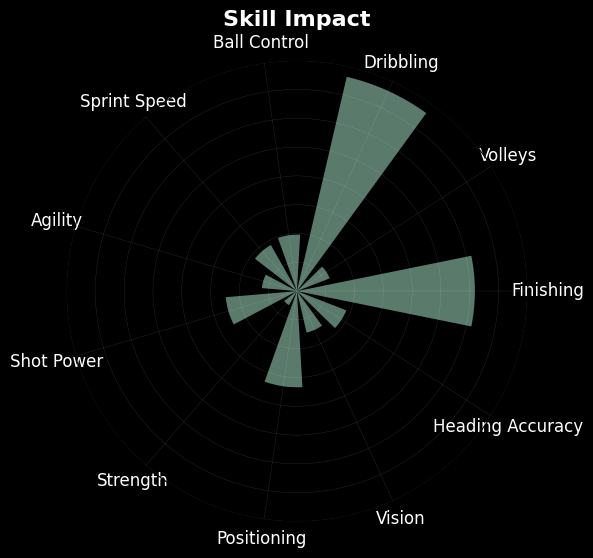

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [76.46230871]
[(256658, 'J. Ngankam', 2024)]


100%|██████████| 1/1 [00:05<00:00,  5.32s/it]


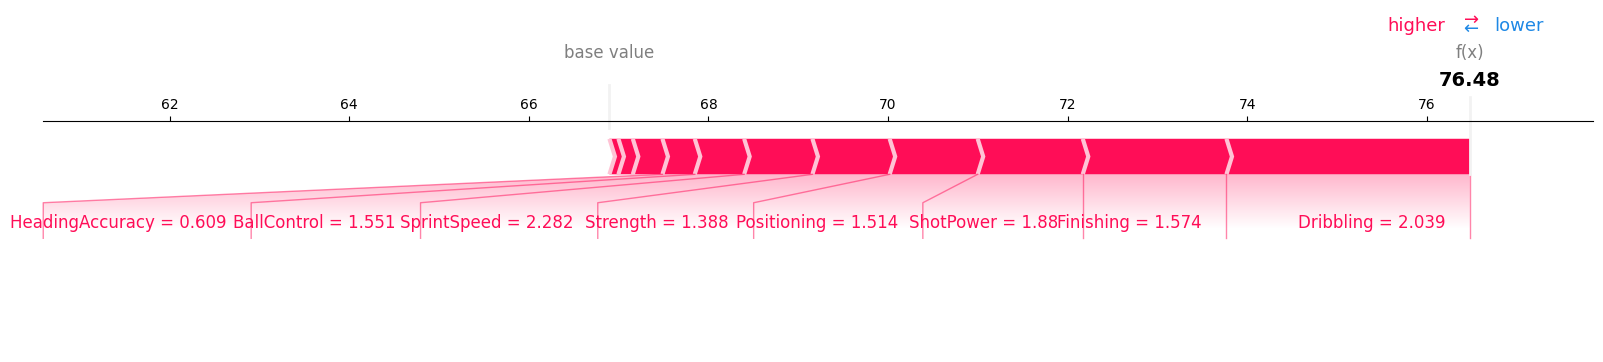

                (256658, J. Ngankam, 2024)  shap
Finishing                             71.0  1.60
Volleys                               53.0  0.10
Dribbling                             75.0  2.71
BallControl                           70.0  0.55
SprintSpeed                           91.0  0.76
Agility                               70.0  0.16
ShotPower                             75.0  1.17
Strength                              78.0  0.86
Positioning                           69.0  0.98
Vision                                60.0  0.33
HeadingAccuracy                       62.0  0.36


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


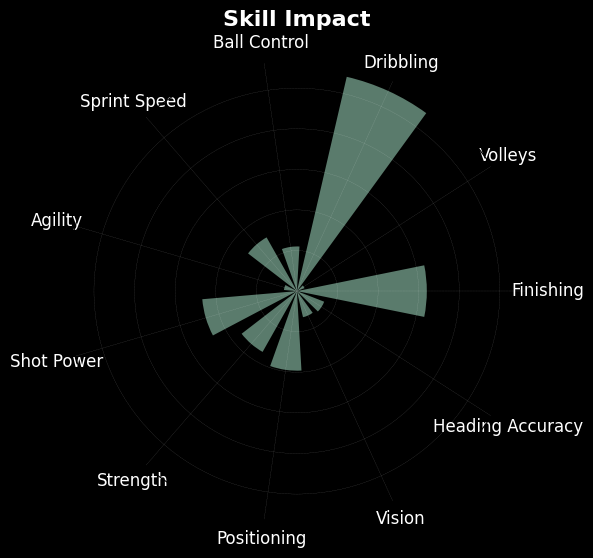

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [82.10322532]
[(256790, 'J. Musiala', 2024)]


100%|██████████| 1/1 [00:05<00:00,  5.06s/it]


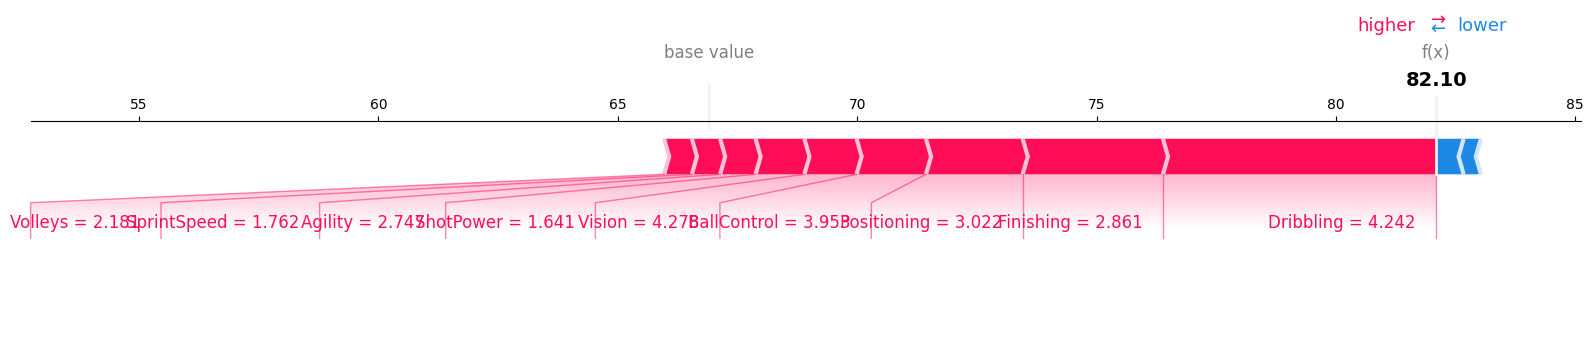

                (256790, J. Musiala, 2024)  shap
Finishing                             79.0  2.93
Volleys                               70.0  0.58
Dribbling                             94.0  5.71
BallControl                           89.0  1.45
SprintSpeed                           86.0  0.59
Agility                               93.0  0.74
ShotPower                             73.0  1.02
Strength                              53.0 -0.36
Positioning                           81.0  2.02
Vision                                82.0  1.09
HeadingAccuracy                       49.0 -0.57


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


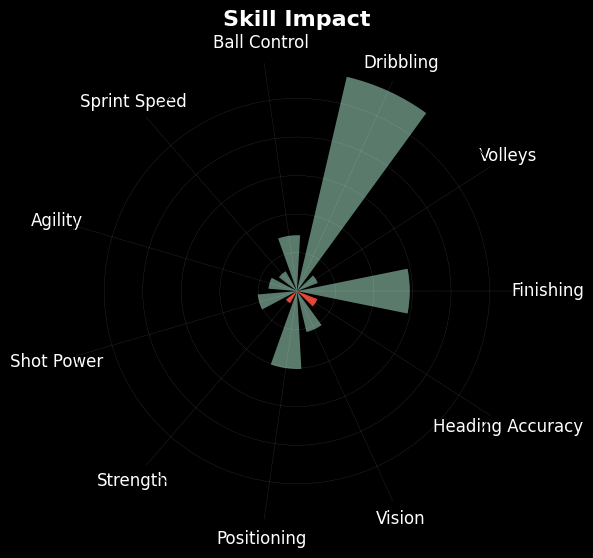

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [36]:
for ID in [268421,259399,240833,251852,256658,256790]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=CONFIG.plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)

# Data Analysis

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       219
        True       0.67      0.67      0.67         3

    accuracy                           0.99       222
   macro avg       0.83      0.83      0.83       222
weighted avg       0.99      0.99      0.99       222

pred [86.41168316]
[(251854, 'Pedri', 2024)]


100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


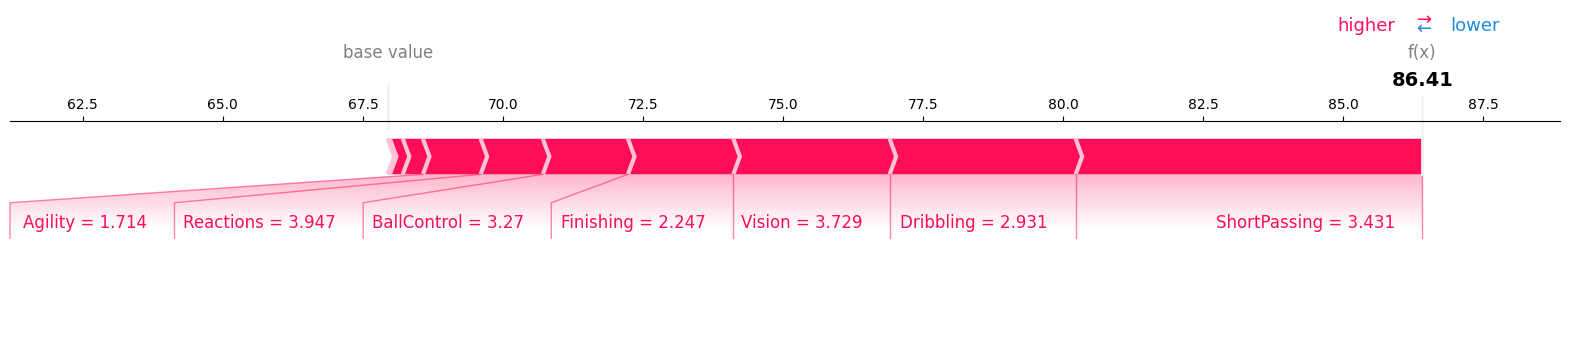

             (251854, Pedri, 2024)  shap
Finishing                     72.0  1.88
Acceleration                  81.0  0.23
ShortPassing                  88.0  6.19
Dribbling                     87.0  3.32
BallControl                   88.0  1.52
Agility                       88.0  1.03
Reactions                     87.0  1.11
Strength                      73.0  0.36
Vision                        88.0  2.79
Penalties                     53.0  0.04


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


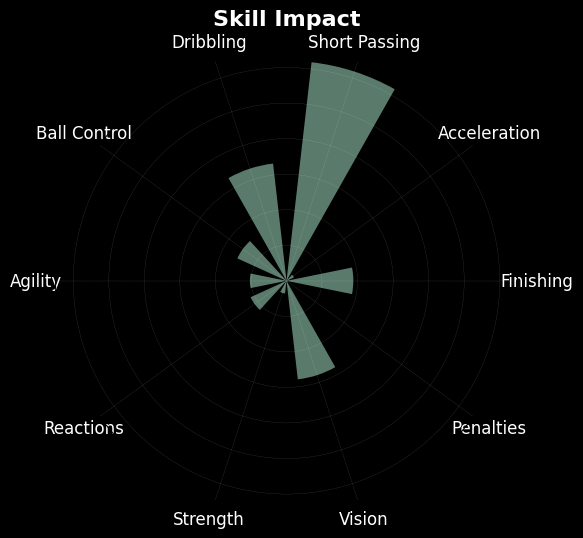

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [86.63727494]
[(256630, 'F. Wirtz', 2024)]


100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


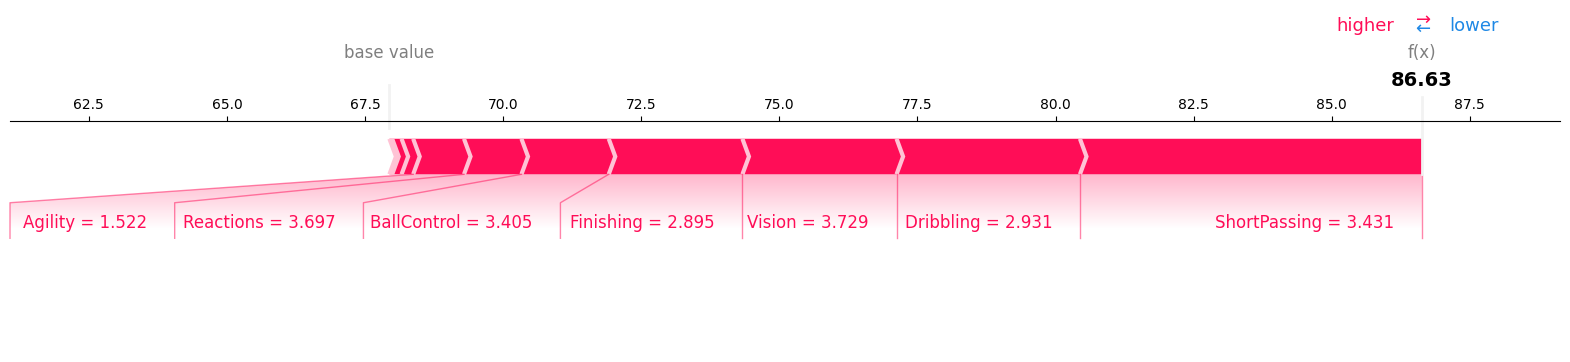

             (256630, F. Wirtz, 2024)  shap
Finishing                        78.0  2.42
Acceleration                     78.0  0.17
ShortPassing                     88.0  6.19
Dribbling                        87.0  3.32
BallControl                      89.0  1.58
Agility                          86.0  0.92
Reactions                        85.0  1.04
Strength                         53.0  0.05
Vision                           88.0  2.79
Penalties                        60.0  0.21


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


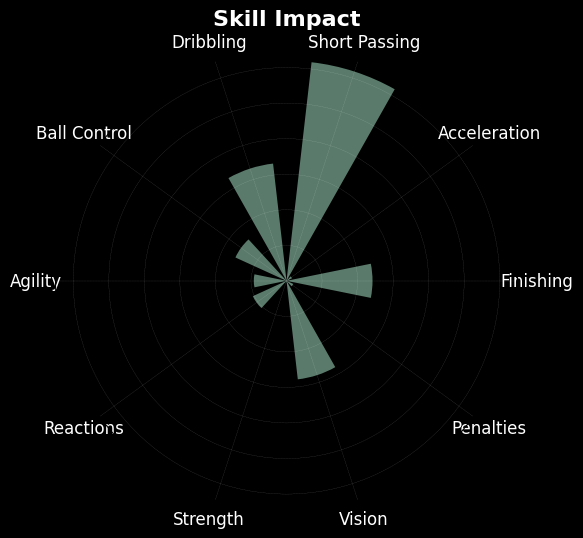

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [86.07014522]
[(256790, 'J. Musiala', 2024)]


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


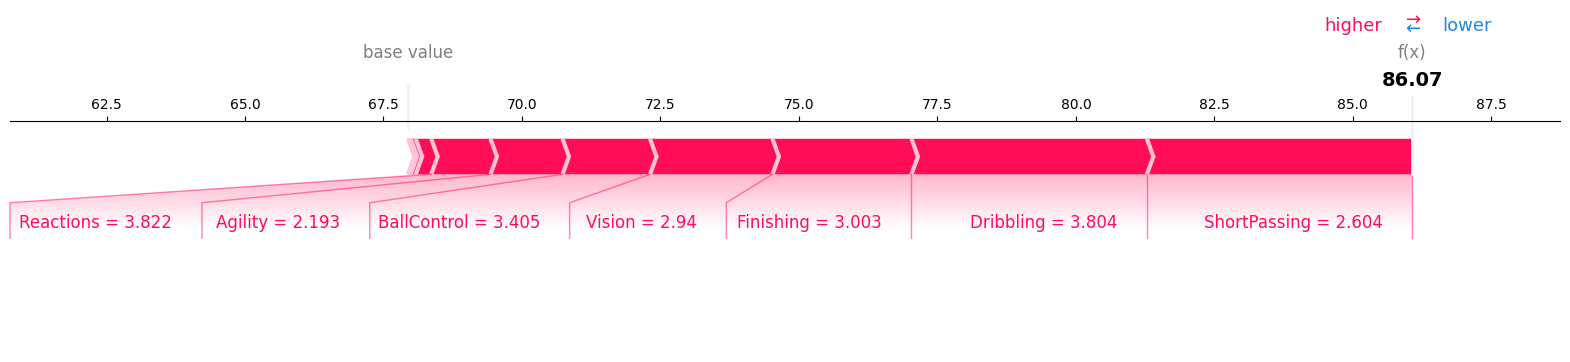

             (256790, J. Musiala, 2024)  shap
Finishing                          79.0  2.51
Acceleration                       84.0  0.28
ShortPassing                       82.0  4.79
Dribbling                          94.0  4.25
BallControl                        89.0  1.58
Agility                            93.0  1.30
Reactions                          86.0  1.07
Strength                           53.0  0.05
Vision                             82.0  2.21
Penalties                          55.0  0.09


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


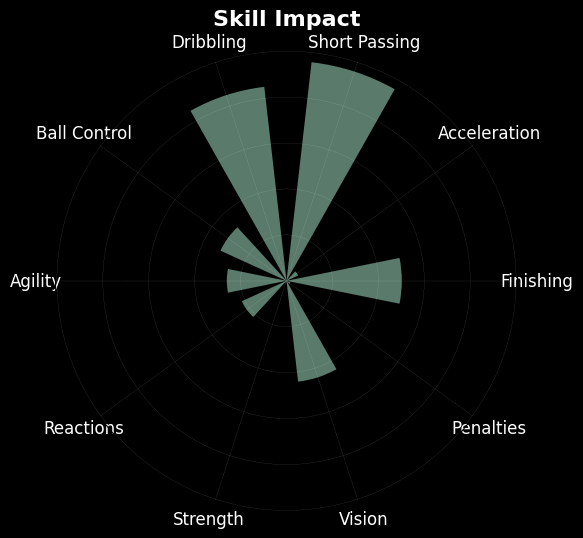

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [81.36091664]
[(251852, 'K. Adeyemi', 2024)]


100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


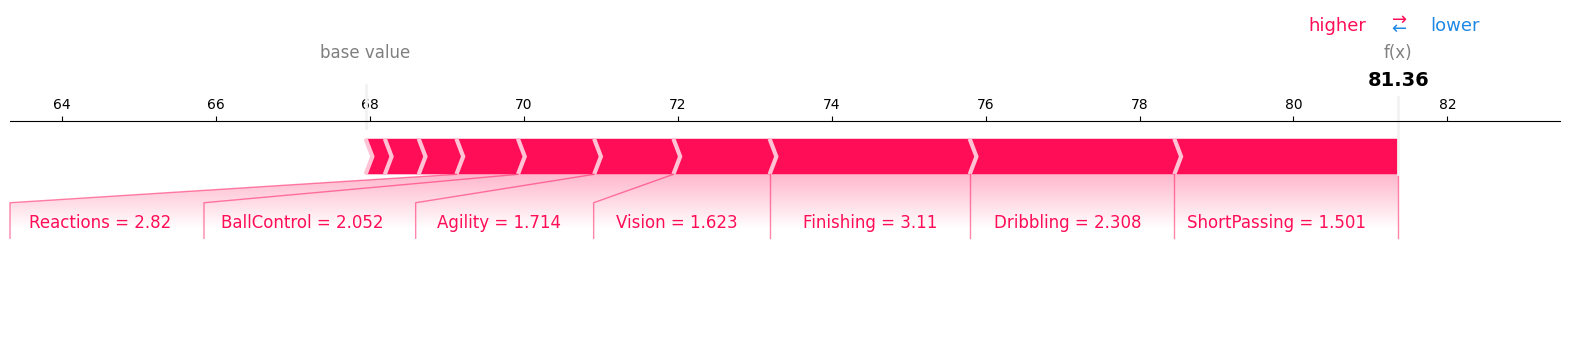

             (251852, K. Adeyemi, 2024)  shap
Finishing                          80.0  2.60
Acceleration                       96.0  0.49
ShortPassing                       74.0  2.91
Dribbling                          82.0  2.66
BallControl                        79.0  0.99
Agility                            88.0  1.03
Reactions                          78.0  0.80
Strength                           66.0  0.25
Vision                             72.0  1.25
Penalties                          70.0  0.44


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


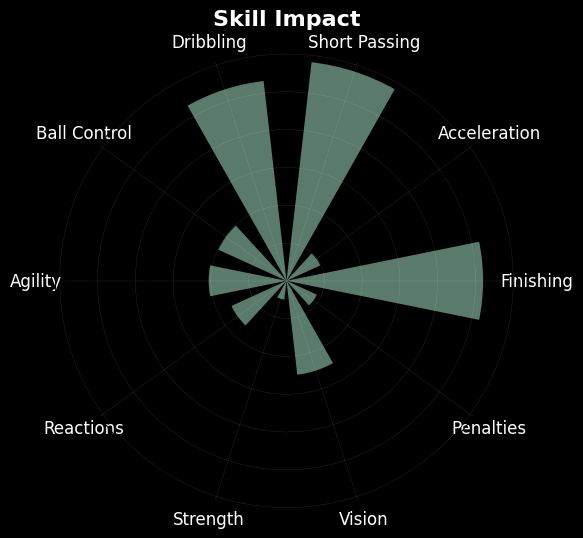

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [37]:
import pickle

with open(f"{CONFIG.MODELS}/offense_potential_attacking_midfielder.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Huber Regression']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

from config import plot_feature_mapping

for ID in [251854,256630,256790,251852]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)